In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Showing First 5 Rows

In [39]:
df = pd.read_csv('StudentsPerformance.csv') #Kaggle dataset
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


### Show Last 3 rows

In [40]:
print(df.tail(3))

     gender race/ethnicity parental level of education         lunch  \
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


### Dataset Overview
Shows the structure of the DataFrame:
1000 rows
8 columns (5 categorical, 3 numeric)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Descriptive Statistics:

In [42]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Value Counts

In [43]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

### GroupBy Mean -- Average Scores

In [44]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### Filter Data
Shows who got less than 90 in maths

In [45]:
df[df['math score'] < 90] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### showing gender male who scored 90 in math

In [46]:
df[(df['math score'] == 90) & (df['gender'] == 'male')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
299,male,group D,associate's degree,free/reduced,none,90,87,75
333,male,group B,associate's degree,standard,none,90,78,81
659,male,group D,associate's degree,standard,none,90,87,85
808,male,group C,high school,standard,none,90,75,69
845,male,group E,master's degree,standard,none,90,85,84
873,male,group E,associate's degree,free/reduced,none,90,90,82


### Sort Values
Ranks students by average score (descending).

In [47]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.sort_values(by='average score', ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
712,female,group D,some college,standard,none,98,100,99,99.000000
...,...,...,...,...,...,...,...,...,...
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,23.000000
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


### Cross-Tabulation
Compares test prep status across lunch types

In [48]:
pd.crosstab(df['lunch'], df['test preparation course'])

test preparation course,completed,none
lunch,,
free/reduced,131,224
standard,227,418


## Visualization

Setting Visual Theme

In [49]:
sns.set(style="whitegrid")

### Creating Visualizations
Gender Distribution count
Math Score Distribution
Average Scores by test preparation course
Histogram of average score charts

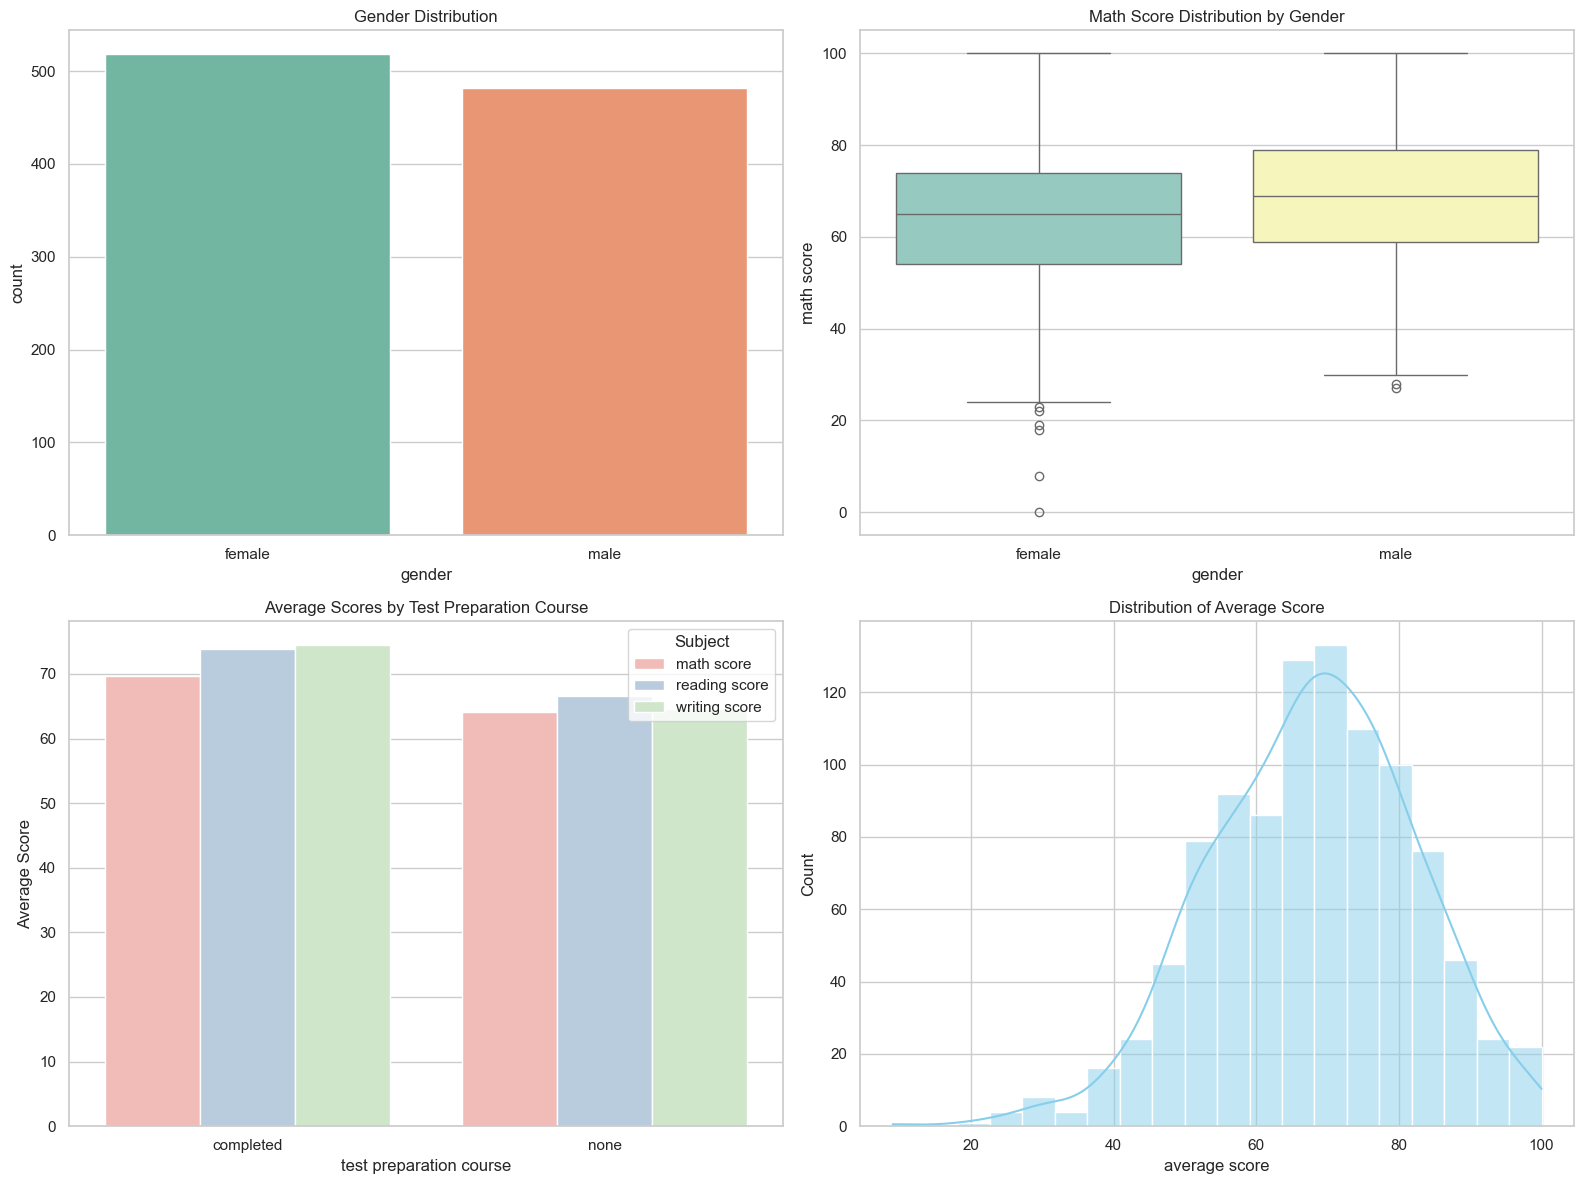

In [50]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gender distribution count plot
sns.countplot(ax=axes[0, 0], x='gender', hue='gender', data=df, palette='Set2', legend=False)
axes[0, 0].set_title('Gender Distribution')

# 2. Math score distribution by gender
sns.boxplot(ax=axes[0, 1], x='gender', y='math score', hue='gender', data=df, palette='Set3', legend=False)
axes[0, 1].set_title('Math Score Distribution by Gender')

# 3. Average scores by test preparation course
avg_scores_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()
avg_scores_prep_melted = avg_scores_prep.melt(id_vars='test preparation course', var_name='Subject', value_name='Average Score')

sns.barplot(ax=axes[1, 0], x='test preparation course', y='Average Score', hue='Subject', data=avg_scores_prep_melted, palette='Pastel1')
axes[1, 0].set_title('Average Scores by Test Preparation Course')

# 4. Histogram of average score
sns.histplot(ax=axes[1, 1], data=df['average score'], bins=20, kde=True, color='skyblue')
axes[1, 1].set_title('Distribution of Average Score')

# Adjust layout
plt.tight_layout()
plt.show()

